This nb contains the steps to go from csv data downloaded from SurveyMonkey to intra- and inter-annotator agreement calculations on ERROR CATEGORY. Steps:
1. Separate personal information+LEAP-Q from Weights+Google HTQA
2. Separate Weights from Google evaluations
3. Separate indexes 0, 17, 34, etc. to get first question per segment (term error, error no term, no error), i.e., error CATEGORY
4. Separate indexes 2, 5, 8, 11 and 14 to get severities (minor, major) (Do not use, go for script 3), i.e., error SEVERITY
5. For inter-annotator agreement, from file resuting from step 3:
(1) transpose rows and columns and map categories to count values, (2) calculate Fleiss' k and Krippendorff alpha
6. For intra-rater agreement: (1) extract 16 segments translated identically from each system's error file, resulting from step 2 (indexes 0, 18, 19, 27, 49, 52, 54, 69, 76, 83, 86, 87, 92, 94, 95, 99); (2) traspose columns to rows (3) name columns after index to erase Question; (4) change column names to identify evaluation's System and Rater; (5) map values to numerical counts according to weights for Cohen's k; (6) calculate Cohen's unweighted and weighted k.

In [1]:
import pandas as pd

# Loading the CSV file STRAIGHT FROM SURVEY MONKEY option csv-originalview-cond-actualanswer TO GET LANGUAGE PROFILE ONLY
file_path = 'rawhtqa.csv'
data = pd.read_csv(file_path)

# Selecting columns from index 0 to 108 (inclusive)
selected_columns = data.iloc[:, 0:107]

# Saving the selected columns
selected_columns.to_csv('personal-language-data.csv', index=False)

print("Columns from index 0 to 108 have been saved to 'personal-language-data.csv'.")

Columns from index 0 to 108 have been saved to 'personal-language-data.csv'.


In [2]:
import pandas as pd

# TO GET SEGMENTS EVALUATION ONLY
file_path = 'rawhtqa.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 107:3507]

selected_columns.to_csv('bothsystems-data.csv', index=False)

print("Segments' data have been saved to 'bothsystems-data.csv'.")

Segments' data have been saved to 'bothsystems-data.csv'.


In [3]:
import pandas as pd

# Load the CSV file bothsystems-data.csv TO GET WEIGHTS DATA ONLY
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 0:1700]

selected_columns.to_csv('Weights-data.csv', index=False)

print("Weights evaluation data have been saved to 'Weights-data.csv'.")

Weights evaluation data have been saved to 'Weights-data.csv'.


In [4]:
import pandas as pd

# Load the CSV file TO GET GOOGLE DATA ONLY
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 1700:3400]

selected_columns.to_csv('Google-data.csv', index=False)

print("Google evaluation data have been saved to 'Google-data.csv'.")

Google evaluation data have been saved to 'Google-data.csv'.


In [5]:
# JUST TO CHECK if beginning and endings are correct:
# lang data va de "Respondent ID" to (Unnamed 106) "Other (please specify language and frequency):"
# both systems data goes from " Are there errors in this segment?  \" to "Other comments (optional):.199"
# Weights-data goes from " Are there errors in this segment?  \" to "Other comments (optional):.99"
# Google-data goes from "Are there errors in this segment?.100  \" to "Other comments (optional):.199 "
# error-Google and errors-Weights should show "5 rows x 100 columns"
# severity-Google and severity-Weights should show "5 rows x 500 columns"
file_path = 'Weights-data.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.tail())

# Specify the file path
file_path = "Weights-data.csv"

# Open the file and read its contents
try:
    with open(file_path, "r") as file:
        contents = file.read()
        print(contents)
except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

       Are there errors in this segment?  \
0                               Response   
1        No, there are no errors at all.   
2  Yes, there are terminological errors.   
3        No, there are no errors at all.   

  Error 1: Copy the erroneous expression. (Crtl+C, Ctrl+V)  \
0                                Open-Ended Response         
1                                                NaN         
2                                           greenish         
3                                                NaN         

  Error 1: Select the severity of the error.  \
0                                   Response   
1                                        NaN   
2                                      Minor   
3                                        NaN   

  Error 1: Please provide the correct expression that should replace the error.  \
0                                Open-Ended Response                              
1                                                NaN         

In [ ]:
import pandas as pd

# Load the WEIGHTS and GOOGLE datasets TO EXTRACT FIRST INDEX, I.E., ERROR CATEGORY (Yes, terminological/Yes, but not terminological/No errors at all)
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

# Define total columns and segment size
total_columns = data.shape[1]  # Total number of columns in dataset
segment_size = 17

# Generate the list of starting indices (0, 17, 34, ..., etc.)
starting_indices = [i for i in range(0, total_columns, segment_size)]

# Extract the columns corresponding to the starting indices
starting_columns = data.iloc[:, starting_indices]

# Save the extracted columns to a new CSV file
output_file = 'errors-both.csv'
starting_columns.to_csv(output_file, index=False)

print(f"Columns at indices {starting_indices} have been saved to '{output_file}'.")


file_path = 'Google-data.csv'
data = pd.read_csv(file_path)

total_columns = data.shape[1]
segment_size = 17

starting_indices = [i for i in range(0, total_columns, segment_size)]

starting_columns = data.iloc[:, starting_indices]

output_file = 'errors-Google.csv'
starting_columns.to_csv(output_file, index=False)

print(f"Columns at indices {starting_indices} have been saved to '{output_file}'.")


file_path = 'Weights-data.csv'
data = pd.read_csv(file_path)


total_columns = data.shape[1]
segment_size = 17

starting_indices = [i for i in range(0, total_columns, segment_size)]

starting_columns = data.iloc[:, starting_indices]

output_file = 'errors-Weights.csv'
starting_columns.to_csv(output_file, index=False)

print(f"Columns at indices {starting_indices} have been saved to '{output_file}'.")

Columns at indices [0, 17, 34, 51, 68, 85, 102, 119, 136, 153, 170, 187, 204, 221, 238, 255, 272, 289, 306, 323, 340, 357, 374, 391, 408, 425, 442, 459, 476, 493, 510, 527, 544, 561, 578, 595, 612, 629, 646, 663, 680, 697, 714, 731, 748, 765, 782, 799, 816, 833, 850, 867, 884, 901, 918, 935, 952, 969, 986, 1003, 1020, 1037, 1054, 1071, 1088, 1105, 1122, 1139, 1156, 1173, 1190, 1207, 1224, 1241, 1258, 1275, 1292, 1309, 1326, 1343, 1360, 1377, 1394, 1411, 1428, 1445, 1462, 1479, 1496, 1513, 1530, 1547, 1564, 1581, 1598, 1615, 1632, 1649, 1666, 1683, 1700, 1717, 1734, 1751, 1768, 1785, 1802, 1819, 1836, 1853, 1870, 1887, 1904, 1921, 1938, 1955, 1972, 1989, 2006, 2023, 2040, 2057, 2074, 2091, 2108, 2125, 2142, 2159, 2176, 2193, 2210, 2227, 2244, 2261, 2278, 2295, 2312, 2329, 2346, 2363, 2380, 2397, 2414, 2431, 2448, 2465, 2482, 2499, 2516, 2533, 2550, 2567, 2584, 2601, 2618, 2635, 2652, 2669, 2686, 2703, 2720, 2737, 2754, 2771, 2788, 2805, 2822, 2839, 2856, 2873, 2890, 2907, 2924, 2941, 29

In [ ]:
import pandas as pd

# TO TRANSPOSE COLUMNS AND ROWS TO BE ABLE TO APPLY INTER-AA MEASUREMENTS ON ERROR CATEGORY (drops the Response column)
file_path = 'errors-both.csv'
data = pd.read_csv(file_path)

transposed_data = data.T

# To remove the first column ("Response")
transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

transposed_data.to_csv('transposed_errors-both.csv', index=False)

print(transposed_data.head())
print(transposed_data.tail())

                                                                                     1  \
Are there errors in this segment?                      No, there are no errors at all.   
Are there errors in this segment?.1                    No, there are no errors at all.   
Are there errors in this segment?.2  Yes, there are errors, but not related to term...   
Are there errors in this segment?.3              Yes, there are terminological errors.   
Are there errors in this segment?.4                    No, there are no errors at all.   

                                                                                     2  \
Are there errors in this segment?                Yes, there are terminological errors.   
Are there errors in this segment?.1  Yes, there are errors, but not related to term...   
Are there errors in this segment?.2              Yes, there are terminological errors.   
Are there errors in this segment?.3              Yes, there are terminological errors.   
Are there

In [8]:
import pandas as pd # TO APPLY INTER-AA CALCULATIONS
from statsmodels.stats.inter_rater import fleiss_kappa

file_path = 'transposed_errors-both.csv'
data = pd.read_csv(file_path)

# Flatten the ratings into a single list and get unique categories
categories = data.apply(pd.Series.value_counts).fillna(0).index.tolist()

# Create a count matrix
fleiss_kappa_matrix = []
for _, row in data.iterrows():
    counts = [row.tolist().count(category) for category in categories]
    fleiss_kappa_matrix.append(counts)

# Convert to a DataFrame for easier inspection
fleiss_kappa_df = pd.DataFrame(fleiss_kappa_matrix, columns=categories)

# Check if all rows sum to the same number of raters
row_sums = fleiss_kappa_df.sum(axis=1)
expected_raters = row_sums.iloc[0]

# Identify problematic rows
problematic_rows = row_sums[row_sums != expected_raters]
if not problematic_rows.empty:
    print("Warning: Some rows have inconsistent numbers of ratings.")
    print("Problematic rows (index and sum):")
    print(problematic_rows)

# Filter out problematic rows
fleiss_kappa_df = fleiss_kappa_df[row_sums == expected_raters]

# Convert the DataFrame back to a list of lists for the fleiss_kappa function
fleiss_kappa_matrix = fleiss_kappa_df.values.tolist()

# Calculate Fleiss' Kappa
kappa = fleiss_kappa(fleiss_kappa_matrix)
print("Fleiss' Kappa:", kappa)


Fleiss' Kappa: 0.21931109100575455


In [ ]:
!pip install krippendorff
import pandas as pd
import krippendorff

# Load data (no missing values, no headers) TO CREATE COUNT MATRIX AND CALCULATE KRIPPENDORFF ALPHA
file_path = 'transposed_errors-both.csv'
data = pd.read_csv(file_path)

# Replace categorical ratings with numerical values
categories = list(data.stack().unique())  # Get unique categories
category_mapping = {category: i for i, category in enumerate(categories)}
numerical_data = data.replace(category_mapping)

# Convert to a NumPy array
ratings_array = numerical_data.to_numpy()

# Calculate Krippendorff's alpha
alpha = krippendorff.alpha(ratings_array, level_of_measurement='nominal')
print("Krippendorff's Alpha:", alpha)

Krippendorff's Alpha: 0.07078774807318955


<ipython-input-9-86cb045224be>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_data = data.replace(category_mapping)


In [ ]:
import pandas as pd

# TO GET PERCENT AGREEMENT
file_path = 'transposed_errors-both.csv'
data = pd.read_csv(file_path)

# Initialize a list to store percent agreements for each item
percent_agreements = []

# Iterate over each row (each item)
for _, row in data.iterrows():
    # Get the number of raters agreeing on the same category
    agreement_count = row.value_counts().max()  # Maximum count of any category
    total_raters = len(row.dropna())  # Total number of raters (excluding NaNs)

    # Calculate percent agreement for this item
    percent_agreement = (agreement_count / total_raters) * 100
    percent_agreements.append(percent_agreement)

# Calculate the average percent agreement across all items
average_percent_agreement = sum(percent_agreements) / len(percent_agreements)

print("Percent Agreement per item:", percent_agreements)
print("Average Percent Agreement:", average_percent_agreement)


Percent Agreement per item: [66.66666666666666, 66.66666666666666, 66.66666666666666, 100.0, 66.66666666666666, 100.0, 33.33333333333333, 66.66666666666666, 66.66666666666666, 66.66666666666666, 100.0, 66.66666666666666, 100.0, 33.33333333333333, 100.0, 33.33333333333333, 66.66666666666666, 66.66666666666666, 100.0, 66.66666666666666, 66.66666666666666, 100.0, 100.0, 66.66666666666666, 66.66666666666666, 100.0, 100.0, 100.0, 66.66666666666666, 100.0, 66.66666666666666, 100.0, 100.0, 66.66666666666666, 66.66666666666666, 66.66666666666666, 100.0, 66.66666666666666, 66.66666666666666, 66.66666666666666, 66.66666666666666, 33.33333333333333, 33.33333333333333, 100.0, 33.33333333333333, 66.66666666666666, 66.66666666666666, 66.66666666666666, 100.0, 100.0, 66.66666666666666, 100.0, 100.0, 66.66666666666666, 100.0, 66.66666666666666, 66.66666666666666, 66.66666666666666, 100.0, 33.33333333333333, 66.66666666666666, 100.0, 33.33333333333333, 66.66666666666666, 66.66666666666666, 66.666666666

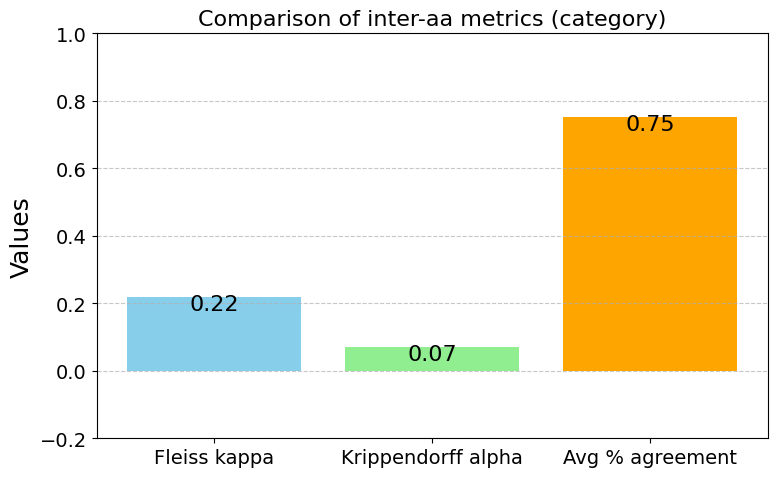

In [11]:
import matplotlib.pyplot as plt # TO CREATE PLOT
import numpy as np

kappa_value = 0.21931109100575455  # Paste Fleiss' Kappa value
alpha_value = 0.07078774807318955  # Paste Krippendorff's Alpha value
average_percent_agreement = 0.7516666666666657  # Paste average percent agreement value

# Labels and values
metrics = ['Fleiss kappa', 'Krippendorff alpha', 'Avg % agreement']
values = [kappa_value, alpha_value, average_percent_agreement]

# Set global font size
plt.rcParams.update({'font.size': 14})

# Create the bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'orange'])

# Annotate the bars with their values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=16)  # Increase font size for annotations

# Adjust y-axis limits to focus on kappa range (between -1 and 1)
plt.ylim(-0.2, 1)

# Add labels and title
plt.ylabel('Values', fontsize=18)
plt.title('Comparison of inter-aa metrics (category)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig('inter-aa-metrics-comparison-category.png')
plt.show()


Specified columns have been saved to 'identical-Weights-data.csv'.
Specified columns have been saved to 'identical-Google-data.csv'.
                                                                          1  \
Are there errors in this segment?           No, there are no errors at all.   
Are there errors in this segment?.18  Yes, there are terminological errors.   
Are there errors in this segment?.19        No, there are no errors at all.   
Are there errors in this segment?.27        No, there are no errors at all.   
Are there errors in this segment?.49        No, there are no errors at all.   

                                                                                      2  \
Are there errors in this segment?                 Yes, there are terminological errors.   
Are there errors in this segment?.18              Yes, there are terminological errors.   
Are there errors in this segment?.19  Yes, there are errors, but not related to term...   
Are there errors in this seg

<ipython-input-12-05d4fdda011d>:131: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(value_mapping)


Cohen's Kappa for Rater 1: 1.0
Cohen's Kappa for Rater 2: 0.6923076923076923
Cohen's Kappa for Rater 3: 0.7746478873239436
Weighted Cohen's Kappa (linear) for Rater 1: 1.0
Weighted Cohen's Kappa (linear) for Rater 2: 0.6404494382022472
Weighted Cohen's Kappa (linear) for Rater 3: 0.8367346938775511


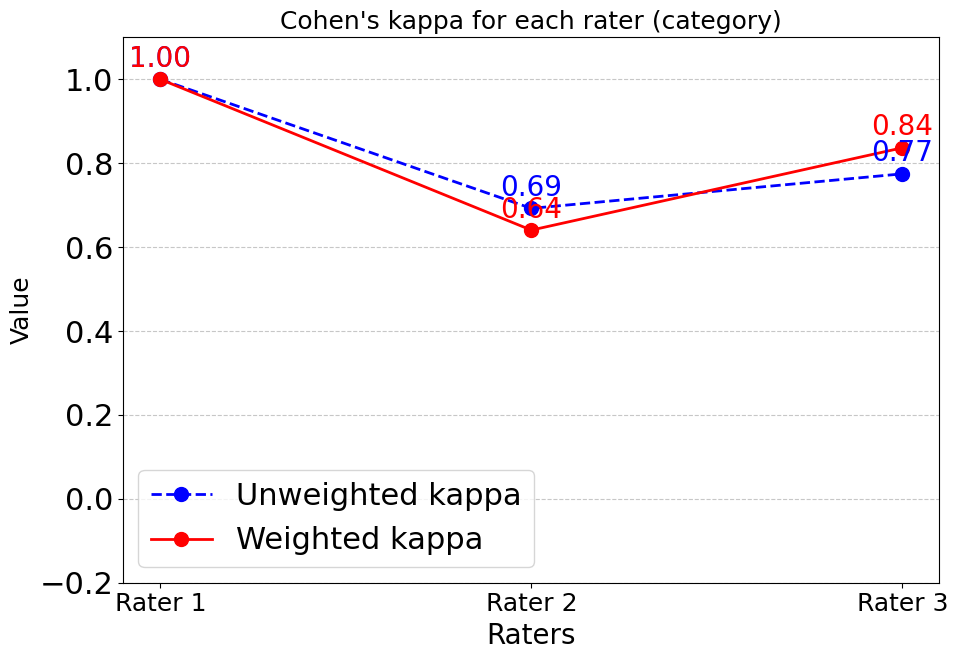

In [ ]:
import pandas as pd # TO PREPARE DATA TO CALCULATE INTRA-AA ON ERROR CATEGORY

# TO EXTRACT SEGMENTS TRANSLATED IDENTICALLY BY BOTH SYSTEMS
file_path = 'errors-Weights.csv'
data = pd.read_csv(file_path)

specific_indexes = [0, 18, 19, 27, 49, 52, 54, 69, 76, 83, 86, 87, 92, 94, 95, 99]  # Indexes of identical translations, previously identified

selected_columns = data.iloc[:, specific_indexes]

selected_columns.to_csv('identical-Weights-data.csv', index=False)

print("Specified columns have been saved to 'identical-Weights-data.csv'.")


file_path = 'errors-Google.csv'
data = pd.read_csv(file_path)

specific_indexes = [0, 18, 19, 27, 49, 52, 54, 69, 76, 83, 86, 87, 92, 94, 95, 99]  # Indexes of identical translations, previously identified

selected_columns = data.iloc[:, specific_indexes]

selected_columns.to_csv('identical-Google-data.csv', index=False)

print("Specified columns have been saved to 'identical-Google-data.csv'.")

# TO TRANSPOSE COLUMNS TO ROWS AND THE OTHER WAY AROUND ELIMINATING NaN
file_path = 'identical-Weights-data.csv'
data = pd.read_csv(file_path)

transposed_data = data.T

# Remove the first column (it contains "Response")
transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

# Drop columns where all values are NaN
### transposed_data = transposed_data.drop(transposed_data.columns[2], axis=1)  # Column 3 has index 2

# Save the cleaned transposed data to a new CSV file
transposed_data.to_csv('transposed_identical-Weights.csv', index=False)

print(transposed_data.head())


file_path = 'identical-Google-data.csv'
data = pd.read_csv(file_path)

transposed_data = data.T

# Remove the first column (if it contains "Response")
transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

# Drop columns where all values are NaN
### transposed_data = transposed_data.drop(transposed_data.columns[2], axis=1)  # Column 3 has index 2

transposed_data.to_csv('transposed_identical-Google.csv', index=False)

print(transposed_data.head())


# TO NAME ALL FIRST COLUMNS THE SAME (ACCORDING TO INDEX BEFORE MERGING FILES)

file_path = 'transposed_identical-Weights.csv'
data = pd.read_csv(file_path)

# Replace the first column (segment names) with the index
data.reset_index(drop=True, inplace=True)

# Save the updated file
data.to_csv('updated_transposed-identical-Weights.csv', index=False)

print(data.head())


file_path = 'transposed_identical-Google.csv'
data = pd.read_csv(file_path)

data.reset_index(drop=True, inplace=True)

data.to_csv('updated_transposed-identical-Google.csv', index=False)

print(data.head())


import pandas as pd # TO CHANGE COLUMN NAMES AND MERGE WEIGHTS + GOOGLE FILES

system_1_data = pd.read_csv('updated_transposed-identical-Weights.csv')
system_2_data = pd.read_csv('updated_transposed-identical-Google.csv')

# Check the number of columns in each system to confirm we have 4 raters
print("System 1 Data Columns:", system_1_data.shape[1])  # Should print 4
print("System 2 Data Columns:", system_2_data.shape[1])  # Should print 4

# Rename the columns based on the number of raters (3 raters)
column_names_system_1 = [f"System 1 Rater {i}\'s rating" for i in range(1, 4)] ### CHANGE TO 5 WITH 4 RATERS
column_names_system_2 = [f"System 2 Rater {i}\'s rating" for i in range(1, 4)] ### CHANGE TO 5 WITH 4 RATERS

# Rename the columns in the dataframes
system_1_data.columns = column_names_system_1
system_2_data.columns = column_names_system_2

# Merge the two dataframes by aligning the columns
merged_data = pd.concat([system_1_data, system_2_data], axis=1)

reordered_columns = []
for i in range(3): ### CHANGE TO 4 WITH 4 RATERS
    reordered_columns.append(f"System 1 Rater {i+1}'s rating")
    reordered_columns.append(f"System 2 Rater {i+1}'s rating")

# Apply the new column order
merged_data = merged_data[reordered_columns]

# Save the merged and reordered data to a new file
merged_data.to_csv('identical-reordered_merged_file.csv', index=False)

# Print the first few rows to verify
print(merged_data.head())


# TO CALCULATE WEIGHTED KAPPA
file_path = 'identical-reordered_merged_file.csv'
data = pd.read_csv(file_path)

value_mapping = {
    "No, there are no errors at all.": 2,
    "Yes, there are terminological errors.": 0,
    "Yes, there are errors, but not related to terminology.": 1
}

# Apply the mapping to all columns in the dataframe
data = data.replace(value_mapping)

data.to_csv('merged-mapped-identical-data.csv', index=False)

print(data.head())

from sklearn.metrics import cohen_kappa_score # TO CALCULATE INTRA RATER AGR WITH COHENS KAPPA

# Cohen's Kappa for Rater 1
rater_1_system_1 = merged_data['System 1 Rater 1\'s rating']
rater_1_system_2 = merged_data['System 2 Rater 1\'s rating']

# Calculate Cohen's Kappa (NOT WEIGHTED)
kappa_rater_1 = cohen_kappa_score(rater_1_system_1, rater_1_system_2)
print(f"Cohen's Kappa for Rater 1: {kappa_rater_1}")

rater_2_system_1 = merged_data['System 1 Rater 2\'s rating']
rater_2_system_2 = merged_data['System 2 Rater 2\'s rating']

kappa_rater_2 = cohen_kappa_score(rater_2_system_1, rater_2_system_2)
print(f"Cohen's Kappa for Rater 2: {kappa_rater_2}")

rater_3_system_1 = merged_data['System 1 Rater 3\'s rating']
rater_3_system_2 = merged_data['System 2 Rater 3\'s rating']

kappa_rater_3 = cohen_kappa_score(rater_3_system_1, rater_3_system_2)
print(f"Cohen's Kappa for Rater 3: {kappa_rater_3}")

# Calculate Cohen's Kappa (WEIGHTED)

kappa_weighted_linear_rater1 = cohen_kappa_score(rater_1_system_1, rater_1_system_2, weights='linear')
print(f"Weighted Cohen's Kappa (linear) for Rater 1: {kappa_weighted_linear_rater1}")

kappa_weighted_linear_rater2 = cohen_kappa_score(rater_2_system_1, rater_2_system_2, weights='linear')
print(f"Weighted Cohen's Kappa (linear) for Rater 2: {kappa_weighted_linear_rater2}")

kappa_weighted_linear_rater3 = cohen_kappa_score(rater_3_system_1, rater_3_system_2, weights='linear')
print(f"Weighted Cohen's Kappa (linear) for Rater 3: {kappa_weighted_linear_rater3}")


# TO MAKE PLOT

import matplotlib.pyplot as plt

# Kappa values from the previous step
unweighted_kappas = [kappa_rater_1, kappa_rater_2, kappa_rater_3]
weighted_kappas = [kappa_weighted_linear_rater1, kappa_weighted_linear_rater2, kappa_weighted_linear_rater3]

# Rater labels
raters = ['Rater 1', 'Rater 2', 'Rater 3']

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create a figure
plt.figure(figsize=(10, 7))

# Plot unweighted kappa (dashed lines with markers)
plt.plot(raters, unweighted_kappas, 'o--', color='blue', label='Unweighted kappa', markersize=10, linewidth=2)

# Plot weighted kappa (solid lines with markers)
plt.plot(raters, weighted_kappas, 'o-', color='red', label='Weighted kappa', markersize=10, linewidth=2)

# Text annotations for unweighted kappa values
for i, (x, y) in enumerate(zip(raters, unweighted_kappas)):
    plt.text(i, y + 0.03, f'{y:.2f}', ha='center', fontsize=20, color='blue')

# Text annotations for weighted kappa values
for i, (x, y) in enumerate(zip(raters, weighted_kappas)):
    plt.text(i, y + 0.03, f'{y:.2f}', ha='center', fontsize=20, color='red')

# Labels and title
plt.ylabel("Value", fontsize=18)
plt.xlabel("Raters", fontsize=20)
plt.title("Cohen's kappa for each rater (category)", fontsize=18)


plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limits to focus on kappa range
plt.ylim(-0.2, 1.1)

# Customize tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)

# legend
plt.legend(loc='best', fontsize=22)

# Save the plot to a file
plt.tight_layout()
plt.savefig('intra-aa-raters-comparison-category.png', dpi=300, bbox_inches='tight')

plt.show()


